In [3]:
import tensorflow as tf

以下是 tensorflow 中錯誤的計算方式  
tensorflow中的計算，需要透過 session 的 run 來執行  
故以下程式並沒有計算z的實際值，只是定義而已

In [6]:
x = tf.constant([[2,4]]) #建立一個常數矩陣 x
y = tf.constant([[8],[7]]) #建立一個常數矩陣 y
z = tf.matmul(x, y) #在tensorflow中，這行並沒有計算z
print(z)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


以下是正確的tensorflow 的算方式  
tensorflow 中的計算，必須使用 Session 中的 graph 來執行  
宣告一個Session 其中會有一個默認的 graph

In [10]:
x = tf.constant([[2,4]]) #建立一個常數矩陣 x
y = tf.constant([[8],[7]]) #建立一個常數矩陣 y
z = tf.matmul(x, y) #並沒有計算，只是定義一個 z
sess = tf.Session()  #宣告了一個 session 後，裡面會有一個默認的 graph
result = sess.run(z)
print(z) #這並不會秀出結果
print(result) #這才會秀出結果
sess.close() #執行過後關閉 session

Tensor("MatMul_3:0", shape=(1, 1), dtype=int32)
[[44]]


In [13]:
#一般來說，可以這樣子定義 session， 比較簡便，無須在最後加 sess.close()
x = tf.constant([[2,4]])
y = tf.constant([[8],[7]])
z = tf.matmul(x, y)
with tf.Session() as sess:
    result = sess.run(z)
    print(result)

[[44]]


In [16]:
# tensorflow 變數的使用
x = tf.Variable([1,2])  #宣告變數 x
a = tf.constant([8,7])
sub = tf.subtract(x,a)  #sub 是一個減法的 operator
add = tf.add(x,a) #add 是一個加法的 operator

#注意，在tensorflow中，執行變數之前，必須先初始化
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) #先初始化
    result = sess.run(sub)
    print(result)
    result = sess.run(add)
    print(result)

[-7 -5]
[9 9]


In [24]:
state = tf.Variable(0, name = 'counter') #建立一個變數，初始化為0，取名為counter
current = tf.add(state, 1) #建立一個operator ，其為 counter 變數 + 1
#tensorflow 中的變數給值，比較複雜，必須透過 "賦值"operator
update = tf.assign(state, current) # state <- current
#注意只要在 tensorflow 中有使用變數的話，就要定義變數初始化 operator
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state)) #列印初始值
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))
#當sess執行 update operator 時，會將 current 指定給 state
#當執行 assign operator 時，會遇到 current ，其中current 也是一個 opertaor
#current 是一個　add operator ，會將state + 1
#如果直接 print(state) 並不會顯示變數的值
#要看變數的內容值 需透過 print(sess.run(state))

0
1
2
3
4
5


In [27]:
#Fetch : 在session中同時執行多個operator
#定義一系列 Float 常數
input1 = tf.constant(3.0) 
input2 = tf.constant(6.0)
input3 = tf.constant(2.5)
add = tf.add(input1, input2)
mul = tf.multiply(input3, add)
with tf.Session() as sess:
    result = sess.run([add, mul]) #Fetch
    print(result)

[9.0, 22.5]


In [32]:
#Feed : 要計算再給值
#創造兩個佔位符 
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
with tf.Session() as sess:
    feed_dict = {input1 : [2.4], input2 : [3.0]}
    #將 feed 的數據以字典的形式傳入 operator
    print(sess.run(output, feed_dict))

[7.2000003]


iter= 0 , m= 1.019796 , b= 2.078857
iter= 1 , m= 1.2749058 , b= 2.6269448
iter= 2 , m= 1.3309281 , b= 2.7752714
iter= 3 , m= 1.3354573 , b= 2.8190305
iter= 4 , m= 1.3269937 , b= 2.8352752
iter= 5 , m= 1.3155657 , b= 2.8441257
iter= 6 , m= 1.3037716 , b= 2.8508422
iter= 7 , m= 1.2922717 , b= 2.856807
iter= 8 , m= 1.2812212 , b= 2.8623893
iter= 9 , m= 1.2706437 , b= 2.867694
iter= 10 , m= 1.2605301 , b= 2.8727558
iter= 11 , m= 1.2508627 , b= 2.8775916
iter= 12 , m= 1.2416226 , b= 2.882213
iter= 13 , m= 1.232791 , b= 2.8866298
iter= 14 , m= 1.22435 , b= 2.8908515
iter= 15 , m= 1.2162822 , b= 2.8948863
iter= 16 , m= 1.2085713 , b= 2.8987427
iter= 17 , m= 1.2012014 , b= 2.9024284
iter= 18 , m= 1.1941575 , b= 2.9059513
iter= 19 , m= 1.187425 , b= 2.9093182
iter= 20 , m= 1.1809903 , b= 2.9125364
iter= 21 , m= 1.1748402 , b= 2.9156122
iter= 22 , m= 1.1689621 , b= 2.918552
iter= 23 , m= 1.163344 , b= 2.9213617
iter= 24 , m= 1.1579744 , b= 2.924047
iter= 25 , m= 1.1528422 , b= 2.9266138
iter= 26

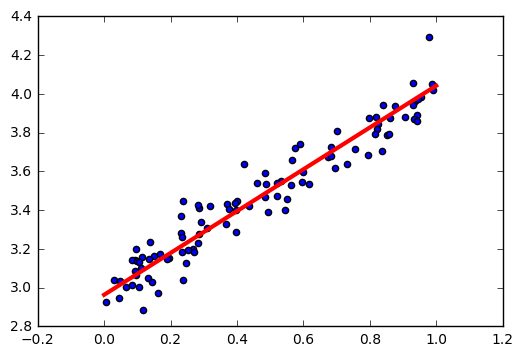

In [3]:
#Tensorflow 最簡單的範例
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#產生一個含有隨機的線性模型
x_data = np.random.rand(100) #均勻隨機產生100個點
noise = 0.1*np.random.randn(100) #隨機項
y_data = x_data * 1 + 3 + noise  # y_data = 1 * x_data + 3  + noise

#宣告 tensorflow 中的變數
# y = m*x + b
m = tf.Variable(0.0)
b = tf.Variable(0.0)
y = m*x_data + b

#代價函數 : loss = mean((y-y_data)^2)
#其中 tf.reduce_mean 計算 tensor中每一個 dimension 的平均值
# tf.square 計算 tensor 中每一個元的平方
loss = tf.reduce_mean(tf.square(y_data - y))

#Gradient desent method  (learning rate = 0.1)
gd = tf.train.GradientDescentOptimizer(0.3)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(50):
        sess.run(train)
        print("iter=", step, ", m=",sess.run(m), ", b=", sess.run(b))
    #將 train 後的結果存下來
    m = sess.run(m);
    b = sess.run(b);
    #繪製結果圖
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot([0, 1], [b, m*1+b], '-r', lw=3)
    plt.show()
